In [1]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Orbitron');
h1, h2 {color:#3636ff; font-size:110%; font-family:'Orbitron'; text-shadow:5px 5px 5px #aaa;}
p, a {color:darkblue; font-size:120%; text-shadow:5px 5px 5px #aaa;}
</style>

# Finding Summation Values
Create an algorithm and a program

""
""
""


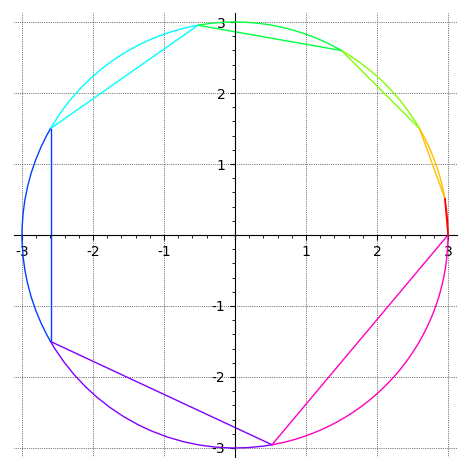

In [1]:
#1
def display_polyarc(n,r):
    A=[0]; L=[]; [A.append(A[i-1]+4*pi*i/(n*(n+1))) for i in [1..n]]
    t=[[html('$A=%s$'%latex(A))]]
    ar=sum([arc((0,0),r,sector=(A[i],A[i+1]),color=hue(i/n)) for i in range(n)])
    for i in range(n+1):
        x=1-2*sin(A[i]/2)^2; y=sqrt(1-x^2)*sign(cos(A[i]/2)); L.append([r*x,r*y])
    l=sum([line((L[i],L[i+1]),color=hue(i/n)) for i in range(n)])
    s=sum([2*r*sin((A[i+1]-A[i])/2) for i in range(n)])
    t+=[[html('$S=%s$'%latex(s))],['$S=%.4f$'%(s.n())]]
    show(table(t)); (ar+l).show(gridlines=True)
display_polyarc(8,3)

In [3]:
#21
var('D,G,i,N'); Vi(D,i)=4/3*pi*((D+i)/2)^3-4/3*pi*((D+i-1)/2)^3
v(D,i)=Vi(D,i).expand().simplify().factor()
pretty_print('volume of the i-th layer:'); pretty_print(v(D,i))
P(D,G,N)=sum(v(D,i)*G/i,i,1,N)
pretty_print('total gravity of N layers:'); pretty_print(P(D,G,N).factor())
from sage.plot.plot3d.shapes import Sphere
def display_shell(D,G,N):
    g=Graphics(); s=Sphere(D/2,color='gray',frame=false)
    layers=sum([Sphere((D+i)/2,opacity=G/i) for i in [1..N]])
    pretty_print('D=%d, G=%.2f, N=%d -> P=%f'%(D,G,N,P(D,G,N))) 
    (g+s+layers).show()
display_shell(7,.75,10)

'volume of the i-th layer:'

1/6*pi*(3*D^2 + 6*D*i + 3*i^2 - 3*D - 3*i + 1)

'total gravity of N layers:'

1/12*pi*(6*D^2*harmonic_number(N) + 12*D*N + 3*N^2 - 6*D*harmonic_number(N) - 3*N + 2*harmonic_number(N))*G

'D=7, G=0.75, N=10 -> P=364.023790'

Graphics3d Object